# Análise do bancos de dados construído pelo Crawler Mercado Livre

Esta é uma análise do banco de dados construído pelo Crawler Mercado Livre. Estes dados foram extraídos durante os dias 12/04/2022 a 21/04/2022 e armazenados num banco postgresql no Heroku. Para mais informações, leia o README.md deste repositório.

## Importando módulos e lendo o banco de dados

##### Módulos

In [2]:
import os
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

##### Carregando variáveis de ambiente e lendo o banco de dados como um dataframe

In [3]:
DB_URL = os.environ["DB_URL"].replace("postgres://", "postgresql://", 1)
engine = create_engine(DB_URL)

In [4]:
df = pd.read_sql("SELECT * FROM mercado_livre_offers", con=engine)
pd.options.mode.chained_assignment = None 

## Data wrangling

### Análise inicial

##### Amostra inicial

In [5]:
df.head()

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,"[Celulares e Telefones, Celulares e Smartphone...","[MAIS VENDIDO, 17º em Celulares e Smartphones ...",True,15,1.799,1512,2022-04-12
1,Philco Hit P10 Dual SIM 128 GB dourado 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,29,1.099,779,2022-04-12
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,"[..., ..., ..., Limpeza e Manutenção, Acessóri...","[MAIS VENDIDO, 1º em Kits Teste Ph e Cloro]",False,5,301,286.14,2022-04-12
3,Notebook Samsung Chromebook XE310XBA cinza 11....,"[Informática, Portáteis e Acessórios, Notebook...",[],True,18,2.299,1879,2022-04-12
4,Multilaser F Dual SIM 32 GB café 1 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,9,459,414.90,2022-04-12


In [6]:
df.tail()

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
9992,Pneu Aro 14 235/60r14 96h Hankook Dynamic Ra03...,"[Acessórios para Veículos, Pneus, Pneus de Car...","[MAIS VENDIDO, 11º em Pneus de Carros e Caminh...",False,10,1.770,1593,2022-04-21
9993,Novo Alisador Cabelo Escova De Barba De Alisam...,"[Beleza e Cuidado Pessoal, Artefatos para Cabe...",[],False,45,178,98.02,2022-04-21
9994,Lipotramina Original Revendedor Autorizado - P...,"[Saúde, Suplementos Alimentares]",[],True,51,202,97,2022-04-21
9995,Kit 3 Canetas Pintura Porcelana Vidro Cerâmica...,"[..., Materiais Escolares, Escolar, Insumos pa...","[MAIS VENDIDO, 7º em Marcadores Compactor]",False,5,92,87.87,2022-04-21
9996,Caneta Fluorescente Painel Lousa Led - Kit 8 U...,"[..., Materiais Escolares, Escolar, Insumos pa...",[],False,5,78,74.95,2022-04-21


##### Tamanho, colunas e tipos de dados

In [7]:
print(df.shape, '\n', '', '\n', df.columns, '\n', '', '\n', df.dtypes)

(9997, 8) 
  
 Index(['name', 'categories', 'best_seller', ' offer_of_the_day', 'discount',
       'old_price', 'new_price', 'date'],
      dtype='object') 
  
 name                         object
categories                   object
best_seller                  object
 offer_of_the_day              bool
discount                     object
old_price                    object
new_price                    object
date                 datetime64[ns]
dtype: object


##### Verificando valores nulos

In [8]:
df.isnull().sum()

name                   0
categories             0
best_seller            0
 offer_of_the_day      0
discount             300
old_price             46
new_price             76
date                   0
dtype: int64

Aparentemente, os valores nulos estão nas colunas 'discount', 'old_price' e 'new_price', no entanto, na amostra do dataset, encontramos listas vazias na coluna 'best_seller'

### Tratando os dados nulos e erros de cálculos

##### Removendo valores

Vamos verificar os valores nulos nas colunas 'new_price' e 'old_price'. Caso os valores de ambas as colunas sejam nulos ou os valores de 'discount' e 'old_price' ou 'new_price', então não é possível calcular qualquer destes campos

In [9]:
df.loc[df['old_price'].isnull() & df['new_price'].isnull()]

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
873,LG K62+ Dual SIM 128 GB white 4 GB RAM,[],[],False,None,None,None,2022-04-12
2296,Bebida Vegetal Original Orgânico A Tal da Cast...,[],[],False,None,None,None,2022-04-13
2518,Bebida Vegetal Amêndoa A Tal da Castanha 1 Litro,[],[],False,None,None,None,2022-04-13
2596,Talco Leite de Rosas Barla Perfumado em frasco...,[],[],False,None,None,None,2022-04-13
2723,"Som automotivo Svart S500 com USB, bluetooth e...",[],[],False,None,None,None,2022-04-14
2982,Chips de Pipoca Manteiga Roots To Go Pacote 35g,[],[],False,None,None,None,2022-04-13
3611,Fórmula infantil em pó Nestlé Nan Supreme 1 e...,[],[],False,None,None,None,2022-04-14
3665,Samsung Galaxy Z Flip3 5G 128 GB cream 8 GB RAM,[],[],False,None,None,None,2022-04-13
3670,Samsung Galaxy Note20 Ultra 5G Dual SIM 256 GB...,[],[],False,None,None,None,2022-04-14
3903,Cafeteira Cadence O’clock CAF205 semi automáti...,[],[],False,None,None,None,2022-04-19


Vemos que neste caso todos os campos estão sem valores, então vamos remover todos os registros com valores nulos.

In [10]:
df.drop(df.loc[df['old_price'].isnull() & df['new_price'].isnull()].index, inplace=True)

Ainda verificando outros valores nulos

In [11]:
df.loc[df['new_price'].isnull()]

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
1709,Controle joystick Leboss LB-2121/S preto,[],[],False,None,35,None,2022-04-12
2040,Martelete DeWalt D25133K amarelo e preto frequ...,[],[],False,None,760,None,2022-04-15
2637,Torneira de cozinha monocomando Pingoo.Casa En...,[],[],False,None,349,None,2022-04-13
2745,No break JBR 800 800VA entrada e saída de 120V...,[],[],False,None,469,None,2022-04-13
3067,"Lixadeira orbital Mondial FLO-2 preta, verm...",[],[],False,None,182,None,2022-04-13
3308,Mouse sem fio Logitech Pebble M350 cinza-azulado,[],[],False,None,99,None,2022-04-13
3479,Teclado sem fio Logitech K230 QWERTY português...,[],[],False,None,116,None,2022-04-13
3598,Chivas Regal Blended Extra 13 Reino Unido 750 mL,[],[],False,None,131,None,2022-04-14
3767,Caminhonete de controle remoto Importway BW026...,[],[],False,None,102,None,2022-04-14
3971,Alto-falante Grasep D-P13 com bluetooth inglat...,[],[],False,None,94,None,2022-04-13


Neste caso, apenas os campos de 'old_price' possuem valores, tornando-se também inviável para qualquer cálculo

In [12]:
df.drop(df.loc[df['new_price'].isnull()].index, inplace=True)

Vamos verificar novamente os valores nulos do nosso dataset

In [13]:
df.isnull().sum()

name                   0
categories             0
best_seller            0
 offer_of_the_day      0
discount             224
old_price              0
new_price              0
date                   0
dtype: int64

##### Transformando o tipo dos dados

Agora vamos transformar os tipos de dados dos campos 'new_price' e 'old_price' para float, para podermos calcular os valores nulos ainda restante na coluna 'discount'.

In [14]:
# Precisei usar o replace pois alguns valores como 1.100 foi convertido para 1.1 em float ao invés de 1100
df['old_price'] = df['old_price'].apply(lambda x: int(x.replace('.', '')))
df['new_price'] = df['new_price'].astype('float')

Vamos transformar também a coluna 'discount' em valores inteiros

In [15]:
df['discount'] = df['discount'].apply(lambda x: int(x) if x != None else x)

##### Corrigindo valores não nulos de 'new_price'

Vemos abaixo que possuimos erros de conta em 'new_price', sendo assim, vamos corrigi-los. 

1) Vamos primeiramente identificar estas linhas

In [16]:
df.loc[(df['old_price'] < df['new_price']) & df['discount'].notnull()]

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
470,Sabonete Infantil Em Barra Cremer Loção Hidrat...,"[Beleza e Cuidado Pessoal, Higiene Pessoal, Sa...",[],False,24.0,3,3.03,2022-04-12
1157,Lençol Descartavel Papel Hospitalar Maca 70x50...,"[Beleza e Cuidado Pessoal, Higiene Pessoal, Le...",[],False,5.0,10,10.35,2022-04-12
1553,Leite Longa Vida Semidesnatado com tampa Itala...,"[Alimentos e Bebidas, Frescos, Laticínios, Lei...",[],False,6.0,4,4.12,2022-04-13
1562,Refrigerante Coca-Cola Garrafa 250ml,"[Alimentos e Bebidas, Bebidas, Refrigerantes]","[MAIS VENDIDO, 6º em Refrigerantes]",False,14.0,3,3.34,2022-04-13
1699,Cabo Otg Usb Tablet Celular Motorola Samsung P...,"[Celulares e Telefones, Acessórios para Celula...","[MAIS VENDIDO, 1º em USB It-Blue]",True,5.0,13,13.19,2022-04-13
...,...,...,...,...,...,...,...,...
8914,50 Escovinha Alongamento Cílios Sobrancelha,"[Beleza e Cuidado Pessoal, Maquiagem, Olhos, C...",[],False,5.0,18,18.04,2022-04-20
8917,Biscoito Recheio Leite Passatempo Pacote 130g,"[Alimentos e Bebidas, Mercearia, Biscoitos]","[MAIS VENDIDO, 15º em Biscoitos]",False,10.0,2,2.24,2022-04-20
9006,Marshmallow Fini Torção 250g,"[Alimentos e Bebidas, Mercearia, Doces e Choco...",[],False,7.0,7,7.43,2022-04-20
9122,Ralo Tampa Grelha Inox Redondo 10 Cm Abre E Fe...,"[Casa, Móveis e Decoração, Banheiros, Acessóri...","[MAIS VENDIDO, 6º em Grelhas]",False,7.0,11,11.15,2022-04-20


2) Vamos adicionar este dataframe a uma variável e remove-lo do dataset original

In [17]:
df_fix_new_price = df.loc[(df['old_price'] < df['new_price']) & df['discount'].notnull()]
df.drop(df.loc[(df['old_price'] < df['new_price']) & df['discount'].notnull()].index, inplace=True)

3) Agora vamos corrigir os valores de 'new_price'

In [18]:
df_fix_new_price['new_price'] = df_fix_new_price['old_price']*(100-df_fix_new_price['discount'])/100

4. Agora vamos adicionar este dataframe ao dataset original

In [19]:
df = pd.concat([df, df_fix_new_price])

##### Corrigindo valores nulos de discount

Vamos realiazar as mesmas operações, separar, remover, corrigir e adicionar os valores novamente no dataframe

In [20]:
df_discount_null = df.loc[df['discount'].isnull()]
df.drop(df.loc[df['discount'].isnull()].index, inplace=True)

In [21]:
df_discount_null['discount'] = round((1-(df_discount_null['new_price']/df_discount_null['old_price']))*100, 2)

In [22]:
df_discount_null.head()

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
70,Micro-ondas Electrolux MTD30 branco 20L 127V,"[Eletrodomésticos, Fornos e Fogões, Microondas...","[MAIS VENDIDO, 19º em Microondas]",True,3.35,537,519.00,2022-04-12
257,Placa Interface Geladeira Electrolux Df50 6480...,"[Eletrodomésticos, Refrigeração, Peças e Acess...","[MAIS VENDIDO, 2º em Placas para Geladeiras]",False,-0.48,199,199.95,2022-04-12
297,"Cabo Flexível 10,0mm Preto 100m - Sil","[Construção, Energia, Cabos e Acessórios, Filt...",[],False,4.91,939,892.91,2022-04-12
318,Maleta Organizadora 34 Esmaltes Manicure+porta...,"[Beleza e Cuidado Pessoal, Manicure e Pedicure...","[MAIS VENDIDO, 1º em Esmaltes Dompel]",True,3.44,61,58.90,2022-04-12
343,Tablet Samsung Galaxy Tab S6 Lite SM-P615 10....,"[Informática, Tablets e Acessórios, Tablets, S...","[MAIS VENDIDO, 1º em Tablets]",False,4.80,2499,2379.00,2022-04-12


Alguns valores de 'discount' ficaram negativos devido aos valores de new_price serem maior do que old_price. Vamos remover estes registros visto que não faz sentido um desconto negativo, aumentando o preço final.

In [23]:
df_discount_null.loc[df_discount_null['discount'] < 0].head()

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
257,Placa Interface Geladeira Electrolux Df50 6480...,"[Eletrodomésticos, Refrigeração, Peças e Acess...","[MAIS VENDIDO, 2º em Placas para Geladeiras]",False,-0.48,199,199.95,2022-04-12
380,Lixa De Polir Unhas Bloco Branco 4 Faces Brilh...,"[Beleza e Cuidado Pessoal, Manicure e Pedicure...","[MAIS VENDIDO, 6º em Lixas de Unhas Dompel]",True,-10.57,7,7.74,2022-04-12
435,Suporte Lixa Pés Anatômica Lixa Descartável Re...,"[Beleza e Cuidado Pessoal, Manicure e Pedicure...","[MAIS VENDIDO, 20º em Lixas de Unhas Dompel]",True,-11.86,7,7.83,2022-04-12
999,Acabamento Quadrado Para Registro Padrão Deca ...,"[Construção, Mobiliário para Banheiros, Tornei...","[MAIS VENDIDO, 17º em Torneiras Convencionais]",False,-1.96,46,46.90,2022-04-12
1089,Driver D220ti Trio Titanio - 90 Watts Rms Jb...,"[Acessórios para Veículos, Som Automotivo, Dri...",[],False,-0.18,248,248.45,2022-04-15


In [24]:
df_discount_null.drop(df_discount_null.loc[df_discount_null['discount'] < 0].index, inplace=True)

Agora vamos adicionar este dataframe ao dataset original novamente

In [25]:
df = pd.concat([df, df_discount_null])

Verificando se ainda há valores nulos

In [26]:
df.isnull().sum()

name                 0
categories           0
best_seller          0
 offer_of_the_day    0
discount             0
old_price            0
new_price            0
date                 0
dtype: int64

##### Calculando valor real de 'discount'

Fazendo uma conta simples, podemos perceber que o valor de 'discount' mostrado no dataset não é valor real de desconto do 'old_price' para o 'new_price'.

In [27]:
df.head(1)

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,"[Celulares e Telefones, Celulares e Smartphone...","[MAIS VENDIDO, 17º em Celulares e Smartphones ...",True,15.0,1799,1512.0,2022-04-12


Vamos calcular o desconto deste primeiro produto

In [28]:
(1-1512/1799)*100

15.953307392996107

Vemos que temos uma diferença de quase 1% entre o valor no dataset e o valor real de desconto. Desta maneira, vamos recalcular todos os descontos dos produtos.

In [29]:
df['discount'] = round((1-(df['new_price']/df['old_price']))*100, 2)

In [30]:
df.head()

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,"[Celulares e Telefones, Celulares e Smartphone...","[MAIS VENDIDO, 17º em Celulares e Smartphones ...",True,15.95,1799,1512.00,2022-04-12
1,Philco Hit P10 Dual SIM 128 GB dourado 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,29.12,1099,779.00,2022-04-12
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,"[..., ..., ..., Limpeza e Manutenção, Acessóri...","[MAIS VENDIDO, 1º em Kits Teste Ph e Cloro]",False,4.94,301,286.14,2022-04-12
3,Notebook Samsung Chromebook XE310XBA cinza 11....,"[Informática, Portáteis e Acessórios, Notebook...",[],True,18.27,2299,1879.00,2022-04-12
4,Multilaser F Dual SIM 32 GB café 1 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,9.61,459,414.90,2022-04-12


Agora vamos verificar se não temos nenhum valor negativo de desconto

In [31]:
df.loc[df['discount'] < 0]

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date


### Criando novas colunas

#### Definido os valores para as colunas subcategory e category

Como podemos ver abaixo, cada produto se encaixa em diversas categorias, as quais vão se especificando mais e mais dentro do site do mercado livre. Deste modo, vamos criar duas novas colunas:

1. Coluna 'category', a qual representa uma categoria mais geral do produto
2. Coluna 'subcategory', a qual representa uma categoria específica do produto com base na coluna 'best_seller'

In [32]:
df['categories'].head()

0    [Celulares e Telefones, Celulares e Smartphone...
1    [Celulares e Telefones, Celulares e Smartphone...
2    [..., ..., ..., Limpeza e Manutenção, Acessóri...
3    [Informática, Portáteis e Acessórios, Notebook...
4    [Celulares e Telefones, Celulares e Smartphone...
Name: categories, dtype: object

In [33]:
df['best_seller'].head()

0    [MAIS VENDIDO, 17º em Celulares e Smartphones ...
1                                                   []
2          [MAIS VENDIDO, 1º em Kits Teste Ph e Cloro]
3                                                   []
4                                                   []
Name: best_seller, dtype: object

#### coluna subcategory

##### Definindo coluna subcategory

Podemos notar que em 'best_seller' temos uma lista com dois valores. O primeiro se trata de anunciar que aquele produto estava entre os mais vendidos daquele dia, e o segundo é a categoria que se encontrava. Deste modo, vamos definir a categoria específica com base no segundo valor desta lista.

Precisamos de uma função que faça igual o procedimento abaixo: 

In [34]:
categoria = ['MAIS VENDIDO','14º em Máquinas de Cortar Cabelo Wmark']
' '.join(categoria[1].split()[2:])

'Máquinas de Cortar Cabelo Wmark'

In [35]:
df['subcategory'] = df['best_seller'].apply(lambda x: ' '.join(x[1].split()[2:]) if x != [] else '')

##### Resultado e análise da coluna subcategory

Vamos ver o dataframe com a nova coluna

In [36]:
df.head(10)

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,"[Celulares e Telefones, Celulares e Smartphone...","[MAIS VENDIDO, 17º em Celulares e Smartphones ...",True,15.95,1799,1512.00,2022-04-12,Celulares e Smartphones Samsung
1,Philco Hit P10 Dual SIM 128 GB dourado 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,29.12,1099,779.00,2022-04-12,
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,"[..., ..., ..., Limpeza e Manutenção, Acessóri...","[MAIS VENDIDO, 1º em Kits Teste Ph e Cloro]",False,4.94,301,286.14,2022-04-12,Kits Teste Ph e Cloro
3,Notebook Samsung Chromebook XE310XBA cinza 11....,"[Informática, Portáteis e Acessórios, Notebook...",[],True,18.27,2299,1879.00,2022-04-12,
4,Multilaser F Dual SIM 32 GB café 1 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,9.61,459,414.90,2022-04-12,
5,Módulo Taramps Ts400 Digital 400w Rms 4 Canais...,"[Acessórios para Veículos, Som Automotivo, Mód...","[MAIS VENDIDO, 1º em Módulos Amplificadores]",False,10.54,257,229.90,2022-04-12,Módulos Amplificadores
6,Moto G31 Dual SIM 128 GB grafite 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],True,15.60,1699,1434.00,2022-04-12,
7,Samsung Galaxy A71 Dual SIM 128 GB azul 6 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",[],False,47.16,3499,1849.00,2022-04-12,
8,"Fritadeira Air Fry Inox Bfr11pi 3,5 Litros Bri...","[..., Pequenos Eletrodomésticos, Para a Cozinh...","[MAIS VENDIDO, 1º em De Ar]",False,47.76,689,359.90,2022-04-12,De Ar
9,Moto E20 Dual SIM 32 GB azul 2 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...","[MAIS VENDIDO, 5º em Celulares e Smartphones]",True,28.21,1099,789.00,2022-04-12,Celulares e Smartphones


Vamos ver quais e quantas subcategorias nós temos

In [37]:
df['subcategory'].value_counts()

                                5932
Celulares e Smartphones           18
Ar Condicionado                   16
Televisores                       13
Elétricos                         11
                                ... 
Espelhos para Banheiro Astra       1
Panetones                          1
Aplicadores de Tags                1
Balanças G-Tech                    1
Motores de Combustão               1
Name: subcategory, Length: 1997, dtype: int64

Tirando os valores '', temos 1996 subcategorias. Contudo, ainda temos 5932 valores vazios. Vamos tentar preenche-los.

##### Preenchendo valores vazios de subcategory

Vamos agora preencher os valores vazios da coluna 'subcategory' procurando estes valores dentro da lista que está na coluna 'categories'

In [38]:
# Criando uma lista com os valores a serem procurados

specific = df['subcategory'].value_counts().index
specific = specific.to_list()
specific[1:]

['Celulares e Smartphones',
 'Ar Condicionado',
 'Televisores',
 'Elétricos',
 'Celulares e Smartphones Motorola',
 'Monitores',
 'Descartáveis',
 'Vinhos',
 'Fontes Chaveadas',
 'Desodorantes',
 'Divisores de Frequência',
 'Protetores Solares',
 'Brocas',
 'Computadores',
 'Kit de Chaves',
 'Travesseiros',
 'Sem Tela',
 'Torneiras Convencionais',
 'Cervejas',
 'Secadores de Cabelo',
 'Suplementos',
 'Baterias',
 'Suplementos Alimentares Integralmédica',
 'Lubrificantes',
 'Tapete Eva',
 'Lixadeiras',
 'Andadores',
 'Extensores e Elásticos',
 'Joysticks',
 'Amaciante',
 'Suportes',
 'Balanças',
 'Notebooks',
 'Shampoos e Condicionadores',
 'Barras de Led',
 'Kit de Chaves Sata',
 'Cabides',
 'Jogos e Kits de Toalhas',
 'Grupos e Kits',
 'Televisores Philips',
 'Perfumes',
 'Antenas de TV',
 'Grelhas',
 'Celulares e Smartphones Apple',
 'Scanners',
 'Para TV',
 'Receptores para TV',
 'Alarmes e Sensores',
 'Grampeadores e Pinadores',
 'Geladeiras',
 'Placas Acústicas',
 'Digitais',
 'Fo

Função para procurar valores na lista e preencher os valores nulos de 'subcategory'

In [39]:
def fill_subcategory_empty_values(subcategory, categories, specific):
    if subcategory == '':
        for cat in specific:
            if cat in categories:
                return cat
    elif subcategory != '':
        return subcategory
    else:
        return ''

In [40]:
df['subcategory'] = df.apply(lambda row: fill_subcategory_empty_values(
    row['subcategory'], row['categories'], specific),
    axis=1)

In [41]:
df['subcategory'].value_counts()

Ferramentas                         221
Celulares e Smartphones             161
Livros Fisicos                      153
Tratamentos com o Cabelo            107
Computadores                         73
                                   ... 
Trampolins Vital Esporte              1
Máquinas de Cortar Cabelo Shinon      1
Espumantes e Champagne Freixenet      1
Cafeteiras Bialetti                   1
Motores de Combustão                  1
Name: subcategory, Length: 1996, dtype: int64

In [42]:
df.isnull().sum()

name                    0
categories              0
best_seller             0
 offer_of_the_day       0
discount                3
old_price               0
new_price               0
date                    0
subcategory          1448
dtype: int64

Podemos ver que diversas linhas foram preenchidas, porém ainda temos 1448 em branco.

##### Excluindo alguns valores nulos restantes de discount

Apareceram 3 linhas com valores nulos de desconto e preços zerados. Vamos exclui-los.

In [43]:
df.loc[df['discount'].isnull()]

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory
2884,Bala Halls mentol extra forte sem glúten 27.5 g,"[Alimentos e Bebidas, Mercearia, Doces e Choco...","[MAIS VENDIDO, 4º em Guloseimas]",False,NaN,0,0.0,2022-04-13,Guloseimas
5440,Bala Halls mentol sem glúten 28 g,"[Alimentos e Bebidas, Mercearia, Doces e Choco...","[MAIS VENDIDO, 10º em Guloseimas]",False,NaN,0,0.0,2022-04-15,Guloseimas
6039,Bala Halls menta sem glúten 28 g,"[Alimentos e Bebidas, Mercearia, Doces e Choco...","[MAIS VENDIDO, 9º em Guloseimas]",False,NaN,0,0.0,2022-04-16,Guloseimas


In [44]:
df.drop(df.loc[df['discount'].isnull()].index, inplace=True)

#### coluna category

##### Criando coluna 'category' com base na coluna 'categories'

In [45]:
df['category'] = df['categories'].apply(lambda x: x[0])

Visualizando a nova coluna

In [46]:
df['category'].head(10)

0       Celulares e Telefones
1       Celulares e Telefones
2                         ...
3                 Informática
4       Celulares e Telefones
5    Acessórios para Veículos
6       Celulares e Telefones
7       Celulares e Telefones
8                         ...
9       Celulares e Telefones
Name: category, dtype: object

##### Consertando valores '...' da coluna category

Algumas linhas ficaram com os valores '...'. Vamos consertar isto

In [47]:
df.loc[df['category'] == '...']

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory,category
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,"[..., ..., ..., Limpeza e Manutenção, Acessóri...","[MAIS VENDIDO, 1º em Kits Teste Ph e Cloro]",False,4.94,301,286.14,2022-04-12,Kits Teste Ph e Cloro,...
8,"Fritadeira Air Fry Inox Bfr11pi 3,5 Litros Bri...","[..., Pequenos Eletrodomésticos, Para a Cozinh...","[MAIS VENDIDO, 1º em De Ar]",False,47.76,689,359.90,2022-04-12,De Ar,...
24,Câmera de segurança Intelbras iM3 com resoluçã...,"[..., ..., Sistemas de Monitoramento, Câmeras ...",[],False,21.66,319,249.90,2022-04-12,Câmeras de Segurança,...
34,Camera Ip Lampada Segurança 360 Visão Noturna ...,"[..., Segurança para Casa, Sistemas de Monitor...",[],True,9.00,136,123.76,2022-04-12,Câmeras de Segurança,...
44,Alto-falante Philco Go PBS25BT portátil com bl...,"[..., ..., Áudio Portátil e Acessórios, Acessó...","[MAIS VENDIDO, 1º em Caixas Bluetooth]",False,25.13,199,149.00,2022-04-12,Caixas Bluetooth,...
...,...,...,...,...,...,...,...,...,...,...
5078,Kit Cartucho Hp 667xl Original Preto+color Par...,"[..., Impressão, Suprimentos de Impressão, Car...",[],False,0.00,175,175.00,2022-04-15,None,...
7194,2 Amortecedor Dianteiro Cofap + Coxim Vw Gol 1...,"[..., Peças de Carros e Caminhonetes, Suspensã...",[],False,4.79,323,307.52,2022-04-20,Amortecedores,...
7703,Capota Strada 2021 2022 2023 Maritima Trek Alu...,"[..., Aces. de Carros e Caminhonetes, Exterior...",[],False,3.68,535,515.33,2022-04-19,Capotas,...
8926,Sanduicheira Grill Antiaderente 800w Inox S-19...,"[..., Pequenos Eletrodomésticos, Para a Cozinh...",[],False,3.70,138,132.90,2022-04-20,None,...


Função para corrigir os valores '...' de category

In [48]:
def fill_category_values(category, categories):
    if category == '...':
        for cat in categories:
            if cat != '...':
                return cat
    else:
        return category

In [49]:
df['category'] = df.apply(lambda row: fill_category_values(
    row['category'], row['categories']), axis=1)

In [50]:
df.loc[df['category'] == '...']

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory,category


In [51]:
df['category'].head(10)

0        Celulares e Telefones
1        Celulares e Telefones
2         Limpeza e Manutenção
3                  Informática
4        Celulares e Telefones
5     Acessórios para Veículos
6        Celulares e Telefones
7        Celulares e Telefones
8    Pequenos Eletrodomésticos
9        Celulares e Telefones
Name: category, dtype: object

Pronto, arrumamos todos os valores desta coluna

#### Redefinindo a coluna best_seller

##### Ideia

Como a coluna best_seller nos mostra que este produto estava entre os mais vendidos do dia, sua posição e categoria especifica, vamos alterar os valores desta coluna apenas com a posição de venda deste produto, pois já criamos a coluna subcategory com base nela.

##### execução

In [52]:
def get_position(row):
    if row != []:
        for i in row[1].split():
            if i.replace('º', '').isnumeric():
                return i
    else:
        return None


df['best_seller'] = df['best_seller'].apply(lambda row: get_position(row))

In [53]:
df.head(10)

,name,categories,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory,category
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,"[Celulares e Telefones, Celulares e Smartphone...",17º,True,15.95,1799,1512.00,2022-04-12,Celulares e Smartphones Samsung,Celulares e Telefones
1,Philco Hit P10 Dual SIM 128 GB dourado 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",None,True,29.12,1099,779.00,2022-04-12,Celulares e Smartphones,Celulares e Telefones
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,"[..., ..., ..., Limpeza e Manutenção, Acessóri...",1º,False,4.94,301,286.14,2022-04-12,Kits Teste Ph e Cloro,Limpeza e Manutenção
3,Notebook Samsung Chromebook XE310XBA cinza 11....,"[Informática, Portáteis e Acessórios, Notebook...",None,True,18.27,2299,1879.00,2022-04-12,Notebooks,Informática
4,Multilaser F Dual SIM 32 GB café 1 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",None,True,9.61,459,414.90,2022-04-12,Celulares e Smartphones,Celulares e Telefones
5,Módulo Taramps Ts400 Digital 400w Rms 4 Canais...,"[Acessórios para Veículos, Som Automotivo, Mód...",1º,False,10.54,257,229.90,2022-04-12,Módulos Amplificadores,Acessórios para Veículos
6,Moto G31 Dual SIM 128 GB grafite 4 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",None,True,15.60,1699,1434.00,2022-04-12,Celulares e Smartphones,Celulares e Telefones
7,Samsung Galaxy A71 Dual SIM 128 GB azul 6 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",None,False,47.16,3499,1849.00,2022-04-12,Celulares e Smartphones,Celulares e Telefones
8,"Fritadeira Air Fry Inox Bfr11pi 3,5 Litros Bri...","[..., Pequenos Eletrodomésticos, Para a Cozinh...",1º,False,47.76,689,359.90,2022-04-12,De Ar,Pequenos Eletrodomésticos
9,Moto E20 Dual SIM 32 GB azul 2 GB RAM,"[Celulares e Telefones, Celulares e Smartphone...",5º,True,28.21,1099,789.00,2022-04-12,Celulares e Smartphones,Celulares e Telefones


Os valores None na coluna best_seller representam que o produto não estava entre os mais vendidos do dia e são importantes para a análise.

### Procedimentos finais da limpeza dos dados

Vendo os dados nulos restantes, vamos ignorar a coluna best_seller como descrito anteriormente e preencher os valores faltantes de specific_category com o último elemento da lista na coluna categories.

In [54]:
df.isnull().sum()

name                    0
categories              0
best_seller          5932
 offer_of_the_day       0
discount                0
old_price               0
new_price               0
date                    0
subcategory          1448
category                0
dtype: int64

#### Preenchendo valores faltantes de subcategory

In [55]:
df_sub_cat_none = df.loc[df['subcategory'].isnull()]

In [56]:
df_sub_cat_none['subcategory'] = df_sub_cat_none['categories'].apply(lambda x: x[-1])

##### Removendo do dataset original

In [57]:
df.drop(df.loc[df['subcategory'].isnull()].index, inplace=True)

##### Análise dos dados preenchidos

In [58]:
df_sub_cat_none['subcategory'].value_counts()

Outros                        461
Outros Utensílios              56
King                           39
Solteiro                       36
Outros Produtos de Limpeza     33
                             ... 
Bateria                         1
Fechaduras de Portas            1
Pais e Filhos                   1
Guitarras e Violões             1
Training                        1
Name: subcategory, Length: 470, dtype: int64

Vemos que 470 novas categorias específicas foram adicionadas.

##### Concat dos dos dados no dataframe original

In [59]:
df = pd.concat([df, df_sub_cat_none])

#### Excluindo coluna categories

Após todas as modificações, podemos excluir a coluna categories, pois toda informação está disponível em 'specific_category' e 'category'.

In [60]:
df.drop(columns='categories', axis=0, inplace=True)

#### Definindo os dias da coluna date

Visto que já sabemos que estes dados foram coletados entre os dias 12/04/2022 e 21/04/2022, vamos definir a coluna date apenas com os dias, sem a necessidade do mês, ano e horários.

In [61]:
df['date'] = df['date'].dt.day

#### Amostra final do dataframe

In [62]:
df.head()

,name,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory,category
0,Samsung Galaxy A32 Dual SIM 128 GB branco 4 GB...,17º,True,15.95,1799,1512.00,12,Celulares e Smartphones Samsung,Celulares e Telefones
1,Philco Hit P10 Dual SIM 128 GB dourado 4 GB RAM,None,True,29.12,1099,779.00,12,Celulares e Smartphones,Celulares e Telefones
2,Cloro Granulado 3 Em 1 Multi Ação 10kg - Genco,1º,False,4.94,301,286.14,12,Kits Teste Ph e Cloro,Limpeza e Manutenção
3,Notebook Samsung Chromebook XE310XBA cinza 11....,None,True,18.27,2299,1879.00,12,Notebooks,Informática
4,Multilaser F Dual SIM 32 GB café 1 GB RAM,None,True,9.61,459,414.90,12,Celulares e Smartphones,Celulares e Telefones


In [63]:
df.tail()

,name,best_seller,offer_of_the_day,discount,old_price,new_price,date,subcategory,category
8926,Sanduicheira Grill Antiaderente 800w Inox S-19...,None,False,3.70,138,132.90,20,Mondial,Pequenos Eletrodomésticos
8974,5l Grande Capacidade Ao Ar Livre Ciclismo Moch...,None,False,4.94,133,126.43,20,Lixada,Ciclismo
8994,Cajon + Bag Case,None,False,0.00,399,399.00,19,Cajones,Instrumentos Musicais
9399,Mochila De Hidratação Aonijie Running Ao Ar Livre,None,True,1.86,162,158.99,21,Outros,Esportes e Fitness
9418,Olympikus Linear Homem Adultos,None,False,0.00,179,179.00,21,Training,"Calçados, Roupas e Bolsas"


In [64]:
df.isnull().sum() # valos nulos necessários na coluna best_seller

name                    0
best_seller          5932
 offer_of_the_day       0
discount                0
old_price               0
new_price               0
date                    0
subcategory             0
category                0
dtype: int64

In [65]:
print(df.shape, '\n', '', '\n', df.columns, '\n', '', '\n', df.dtypes)

(9844, 9) 
  
 Index(['name', 'best_seller', ' offer_of_the_day', 'discount', 'old_price',
       'new_price', 'date', 'subcategory', 'category'],
      dtype='object') 
  
 name                  object
best_seller           object
 offer_of_the_day       bool
discount             float64
old_price              int64
new_price            float64
date                   int64
subcategory           object
category              object
dtype: object


Após todos estes procedimentos de limpeza, podemos partir para uma análise dos dados.

## Data Analysis

### Análise dos dias

#### Quantidade de produtos por dia

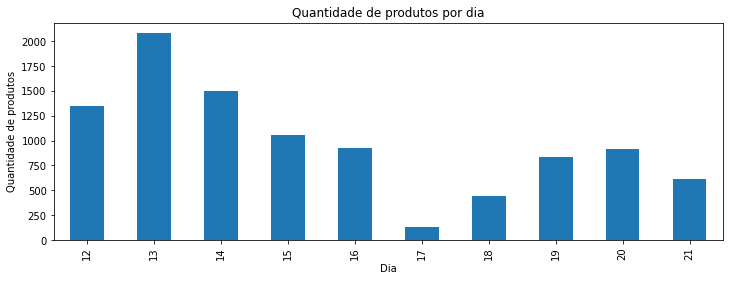

In [66]:
df.groupby('date')['name'].count().plot(kind='bar', figsize=(12,4), title='Quantidade de produtos por dia', ylabel='Quantidade de produtos', xlabel='Dia');

#### Dias com maior média de descontos

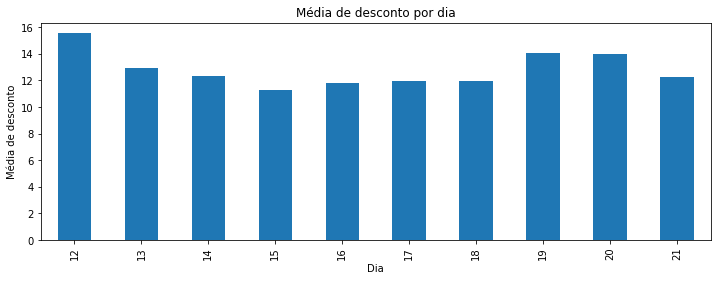

In [67]:
df.groupby('date')['discount'].mean().plot(kind='bar', figsize=(12,4), title='Média de desconto por dia', ylabel='Média de desconto', xlabel='Dia');

#### Dias com mais ofertas do dia

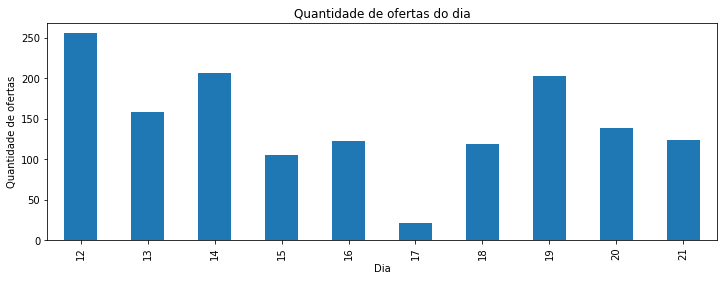

In [68]:
df.loc[df[' offer_of_the_day'] == True].groupby('date')[' offer_of_the_day'].count().plot(kind='bar', figsize=(12,4), title='Quantidade de ofertas do dia', ylabel='Quantidade de ofertas', xlabel='Dia');

#### Dia com mais subcategorias ofertas do dia

### Análise das categorias

#### 50 Categoria mais ofertadas

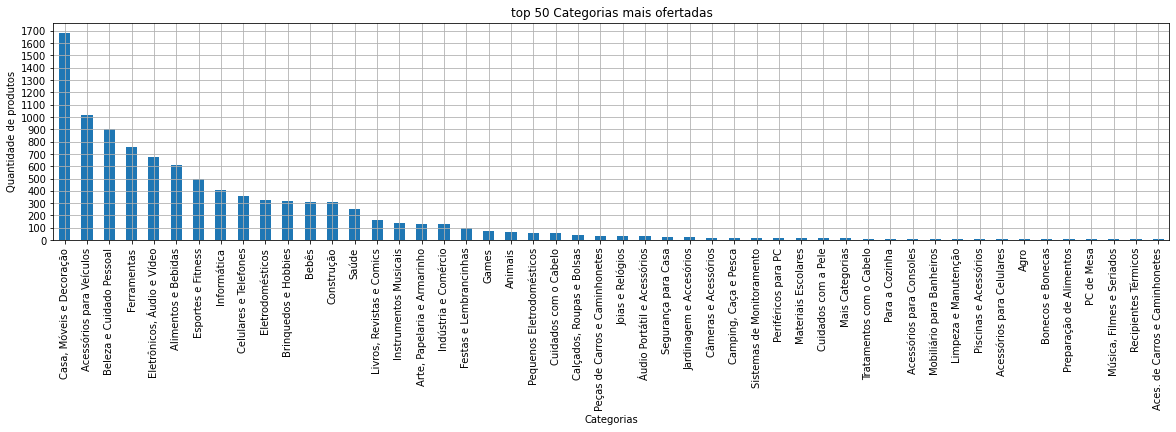

In [69]:
df.groupby('category')['category'].count().sort_values(ascending=False).head(50).plot(
    kind='bar', figsize=(20,4), title='top 50 Categorias mais ofertadas', grid=True, yticks=range(0, 1800, 100), ylabel='Quantidade de produtos', xlabel='Categorias');

#### Média de descontos por categoria

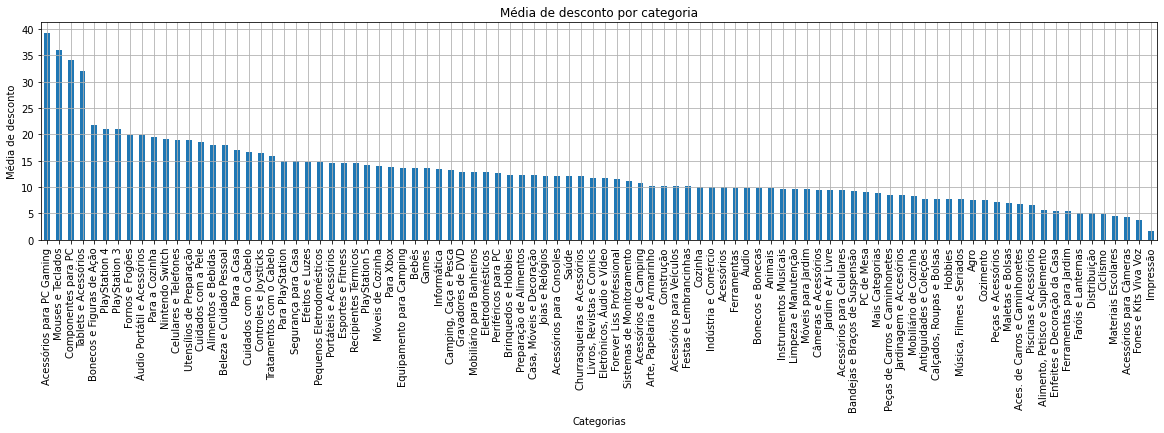

In [70]:
df.groupby('category')['discount'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Média de desconto por categoria', grid=True, yticks=range(0, 45, 5), xlabel='Categorias', ylabel='Média de desconto');

#### Categorias ofertas do dia

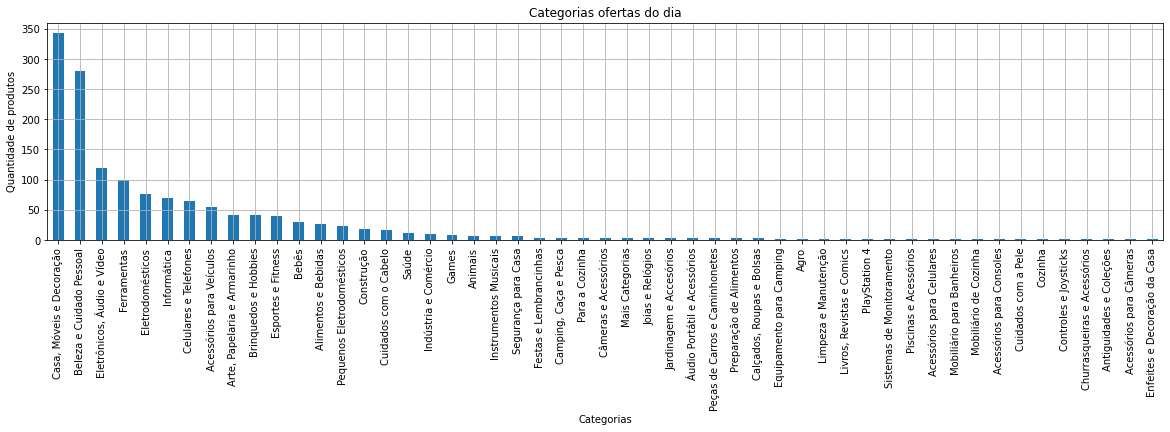

In [71]:
df.loc[df[' offer_of_the_day'] == True].groupby('category')['discount'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Categorias ofertas do dia', grid=True, xlabel='Categorias', ylabel='Quantidade de produtos');

#### Média de desconto das categorias ofertas do dia

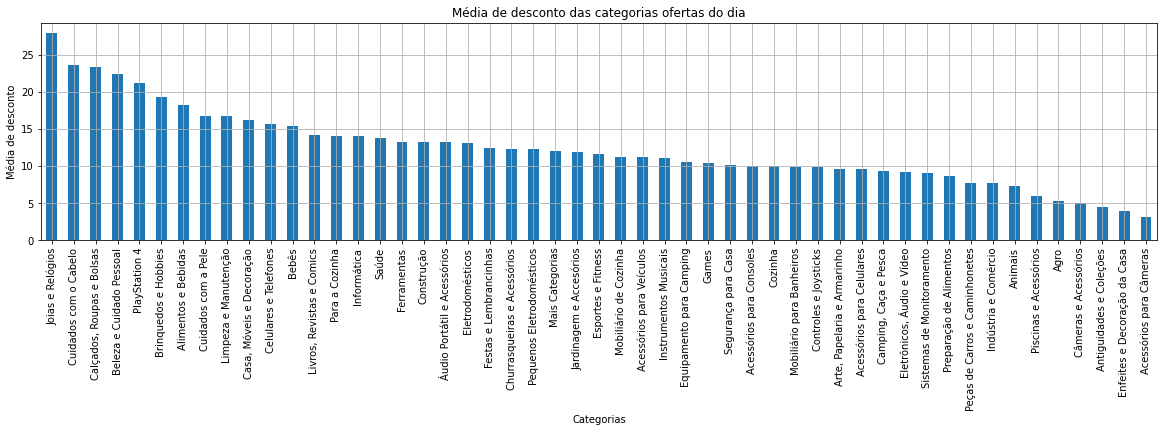

In [72]:
df.loc[df[' offer_of_the_day'] == True].groupby('category')['discount'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Média de desconto das categorias ofertas do dia', grid=True,
    xlabel='Categorias', ylabel='Média de desconto');

### Análise das subcategorias

#### Subcategorias mais ofertadas

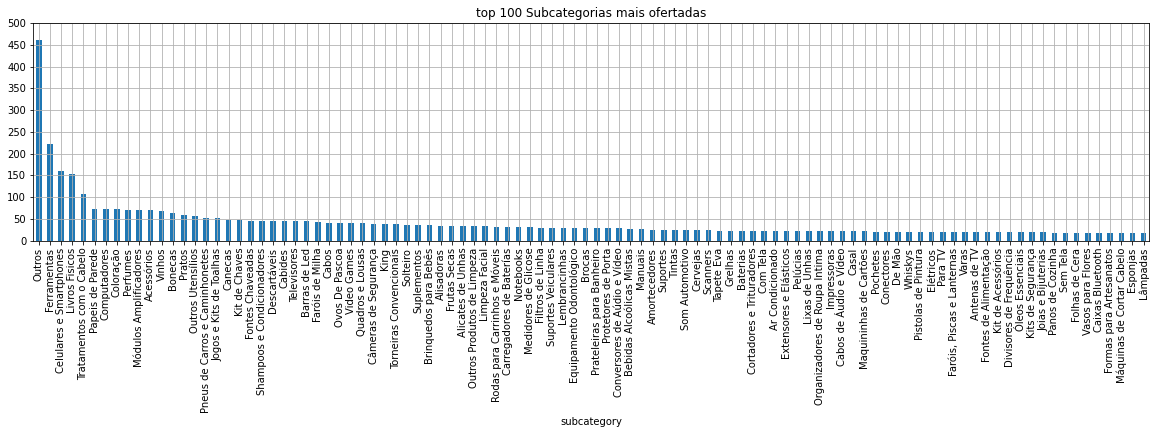

In [73]:
df.groupby('subcategory')['subcategory'].count().sort_values(ascending=False).head(100).plot(
    kind='bar', figsize=(20,4), title='top 100 Subcategorias mais ofertadas', yticks=range(0,550, 50), grid=True);

#### Média de descontos por subcategoria

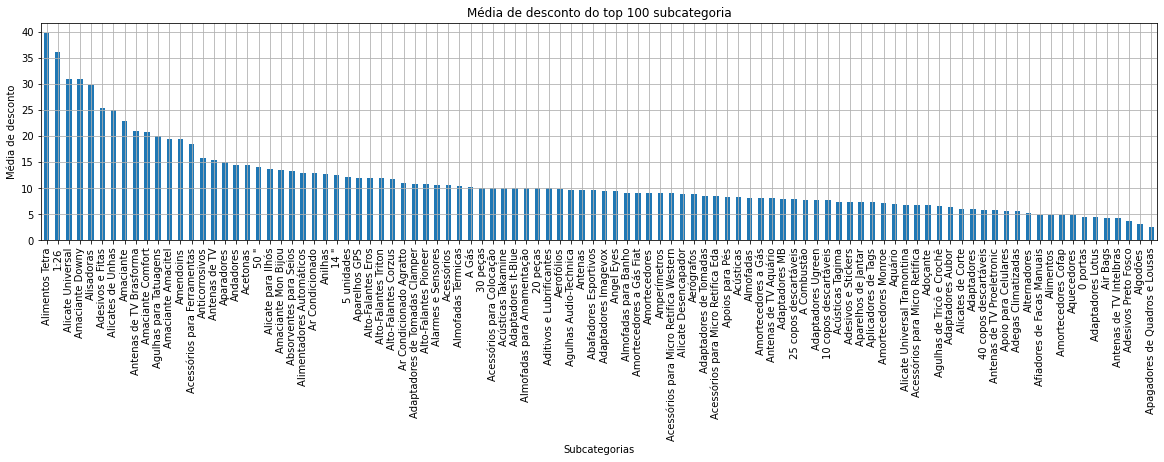

In [74]:
df.groupby('subcategory')['discount'].mean().head(100).sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Média de desconto do top 100 subcategoria', grid=True, yticks=range(0, 45, 5), xlabel='Subcategorias', ylabel='Média de desconto');

#### Subcategorias ofertas do dia

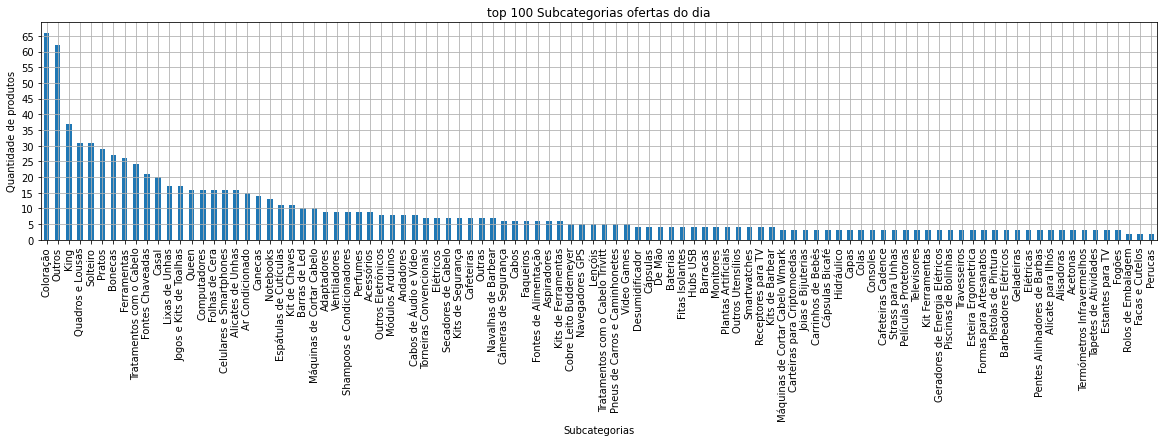

In [75]:
df.loc[df[' offer_of_the_day'] == True].groupby('subcategory')['discount'].count().sort_values(ascending=False).head(100).plot(
    kind='bar', figsize=(20,4), title='top 100 Subcategorias ofertas do dia', grid=True, xlabel='Subcategorias',
    ylabel='Quantidade de produtos', yticks=range(0, 70, 5));

#### Média de desconto das subcategorias ofertas do dia

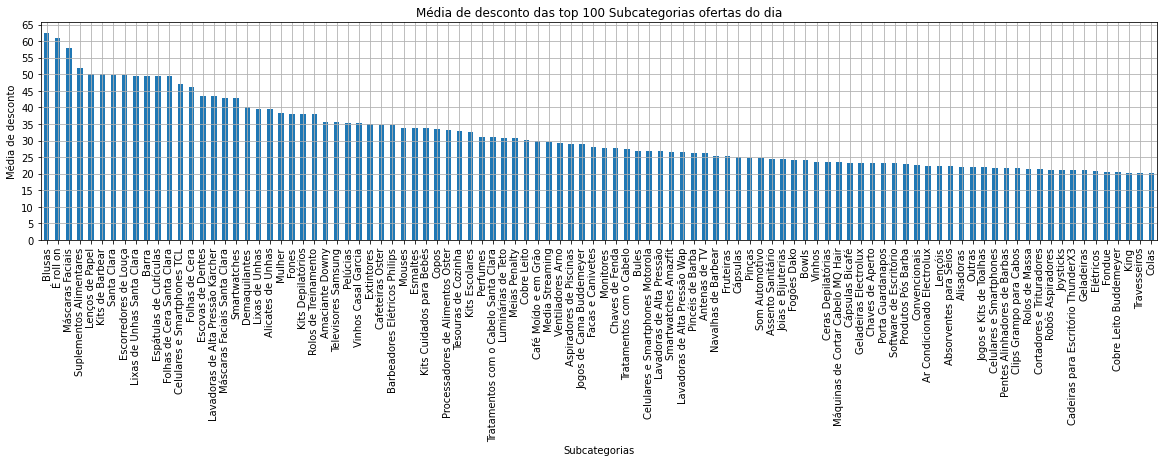

In [76]:
df.loc[df[' offer_of_the_day'] == True].groupby('subcategory')['discount'].mean().sort_values(ascending=False).head(100).plot(
    kind='bar', figsize=(20,4), title='Média de desconto das top 100 Subcategorias ofertas do dia', grid=True,
    xlabel='Subcategorias', ylabel='Média de desconto', yticks=range(0, 70, 5));

### Análise dos best_sellers

#### Quantidade da posição nos mais vendidos

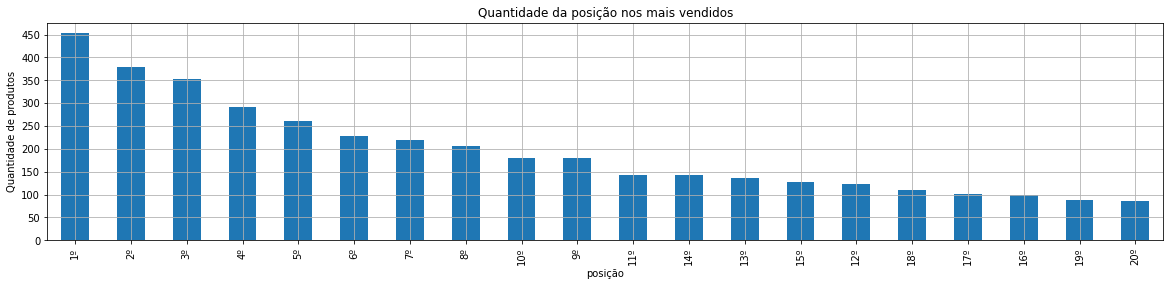

In [77]:
df.groupby('best_seller')['category'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Quantidade da posição nos mais vendidos', grid=True,
    ylabel='Quantidade de produtos', xlabel='posição', yticks=range(0, 500, 50));

#### Posições com maiores médias de descontos

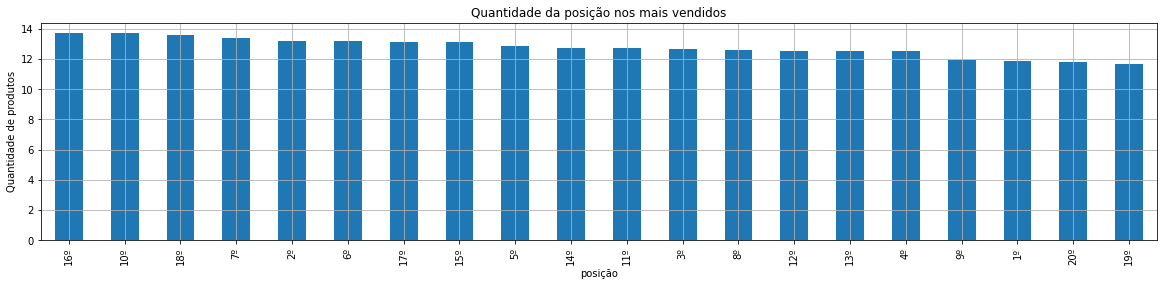

In [78]:
df.groupby('best_seller')['discount'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Quantidade da posição nos mais vendidos', grid=True,
    ylabel='Quantidade de produtos', xlabel='posição');

#### Categorias com mais posições 1º

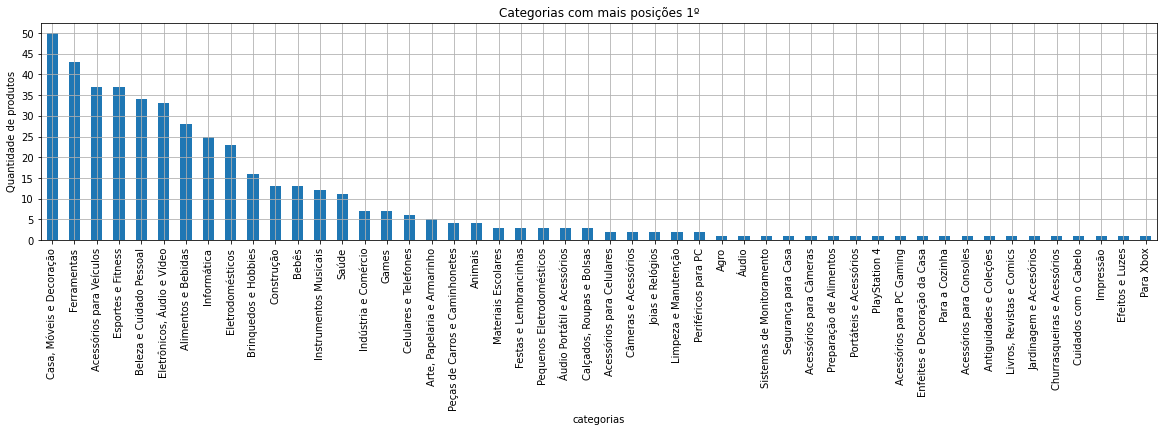

In [79]:
df.loc[df['best_seller']=='1º'].groupby('category')['best_seller'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Categorias com mais posições 1º', grid=True,
    ylabel='Quantidade de produtos', xlabel='categorias', yticks=range(0, 55, 5));

#### Dias com mais posições 1º

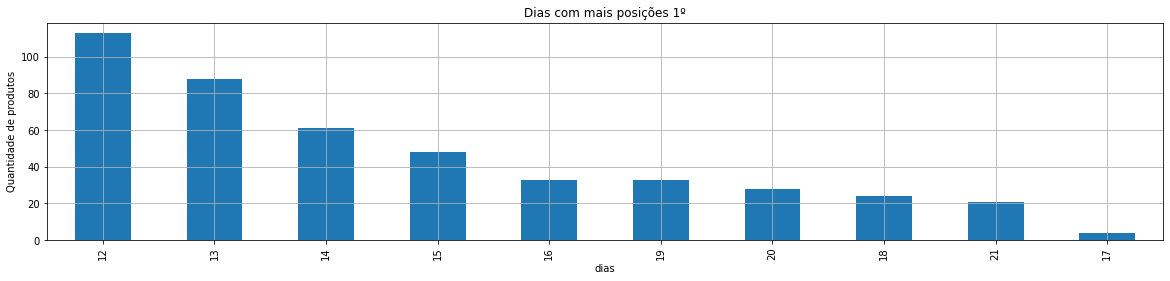

In [80]:
df.loc[df['best_seller']=='1º'].groupby('date')['best_seller'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Dias com mais posições 1º', grid=True,
    ylabel='Quantidade de produtos', xlabel='dias');

#### Produtos ofertas do dia com posição 1°

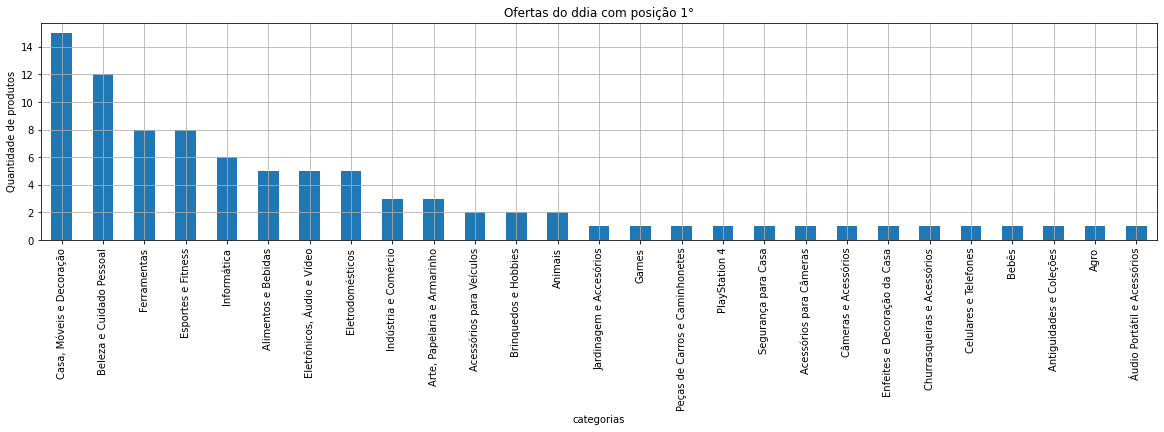

In [81]:
df.loc[(df[' offer_of_the_day']==True) & (df['best_seller'] == '1º')].groupby('category')['best_seller'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Ofertas do ddia com posição 1°', grid=True,
    ylabel='Quantidade de produtos', xlabel='categorias');

#### Produtos que não eram ofertas do dia mas estavam em 1º lugar dos mais vendidos

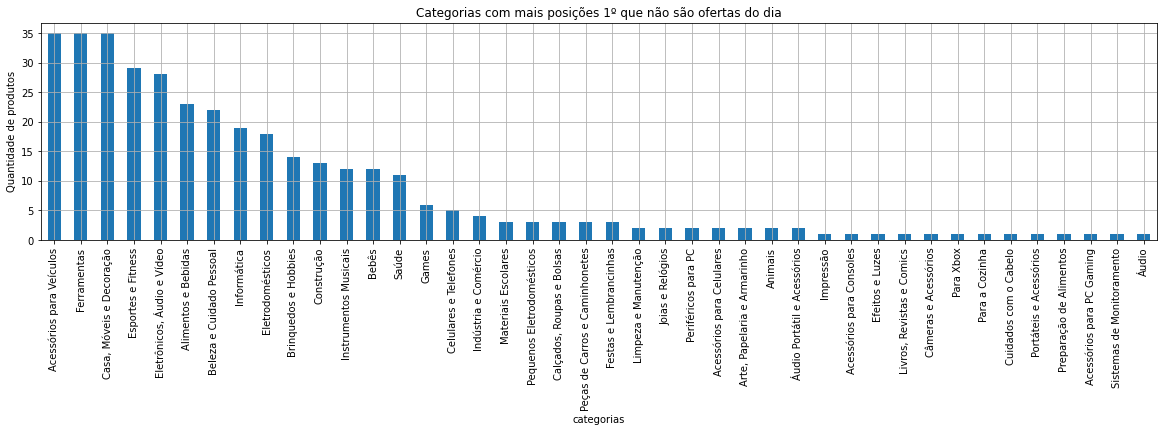

In [82]:
df.loc[(df[' offer_of_the_day']==False) & (df['best_seller'] == '1º')].groupby('category')['best_seller'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(20,4), title='Categorias com mais posições 1º que não são ofertas do dia', grid=True,
    ylabel='Quantidade de produtos', xlabel='categorias');

### Outras análises

#### Quantidade de produtos por faixa de descontos

In [83]:
d80e70 = len(df.loc[(df['discount'] >= 70) & (df['discount'] <= 80)])
d70e60 = len(df.loc[(df['discount'] >= 60) & (df['discount'] < 70)])
d60e50 = len(df.loc[(df['discount'] >= 50) & (df['discount'] < 60)])
d50e40 = len(df.loc[(df['discount'] >= 40) & (df['discount'] < 50)])
d40e30 = len(df.loc[(df['discount'] >= 30) & (df['discount'] < 40)])
d30e20 = len(df.loc[(df['discount'] >= 20) & (df['discount'] < 30)])
d20e10 = len(df.loc[(df['discount'] >= 10) & (df['discount'] < 20)])
d10e5 = len(df.loc[(df['discount'] >= 5) & (df['discount'] < 10)])
d5e2 = len(df.loc[(df['discount'] >= 2) & (df['discount'] < 5)])
d2e0 = len(df.loc[(df['discount'] >= 0) & (df['discount'] < 2)])


In [84]:
y = [d80e70, d70e60, d60e50, d50e40, d40e30, d30e20, d20e10, d10e5, d5e2, d2e0]
x = ['80-70', '70-60', '60-50', '50-40', '40-30', '30-20', '20-10', '10-5', '5-2', '2-0']

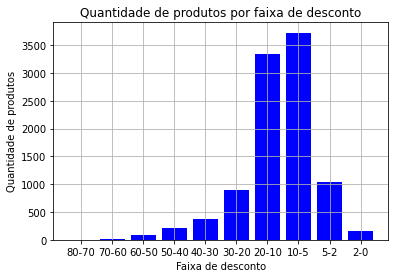

In [86]:
plt.bar(x, y, color='blue')
plt.title('Quantidade de produtos por faixa de desconto')
plt.grid()
plt.xlabel('Faixa de desconto')
plt.ylabel('Quantidade de produtos')
plt.show()